<a href="https://colab.research.google.com/github/Valentina3147/ValentinaLopez/blob/main/Semana2/Entregable_Ejercicio_LimpiezaPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Ejercicio: Limpieza usando pandas

In [49]:
# Cargar el dataset DailyDelhiClimateTrain.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data =pd.read_csv("DailyDelhiClimateTrain (1).csv", header = 0)
data.head ()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [50]:
# Verificar las estadísticas generales del dataset
# Revisar la información, encuentre en los datos máximos y mínimos de las variables
# Revisar si encuentra algo fuera de lo normal

print(data.describe())
data.isnull().sum()
data.info()



          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [51]:
# Eliminar las columnas meantemp, humidity y wind_speed. Mantenga la columna meanpressure
data_aux = data.drop(['meantemp', 'humidity', 'wind_speed'],axis=1)

data_aux.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


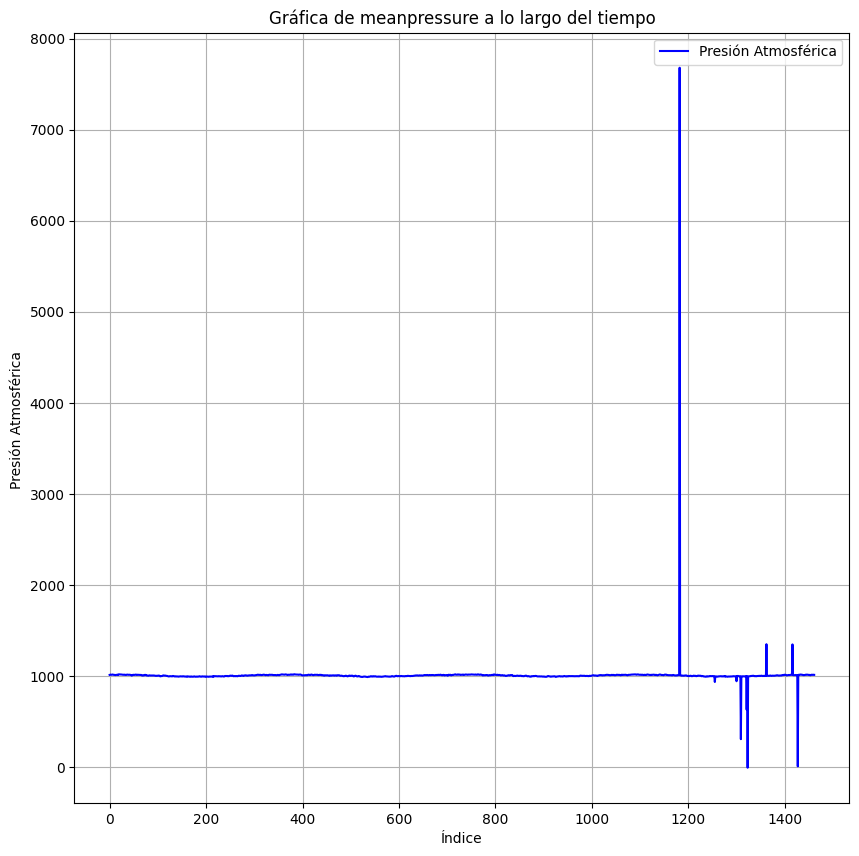

In [52]:
from datetime import date
# Graficar los datos del campo meanpressure
# Qué puede decir de la gráfica?
# Hay algo atípico en esa respuesta temporal?


import matplotlib.dates as mdates
%matplotlib inline
plt.rc('figure',figsize=(10,10))



plt.plot(data_aux['meanpressure'], label='Presión Atmosférica', color='b')

plt.title('Gráfica de meanpressure a lo largo del tiempo')
plt.xlabel('Índice')
plt.ylabel('Presión Atmosférica ')
plt.legend()
plt.grid(True)
plt.show()

#la presion media se muestra estable durante largo tiempo, por lo que es consistente

#no se encuentran anomalias, la presion sigue un patron estable


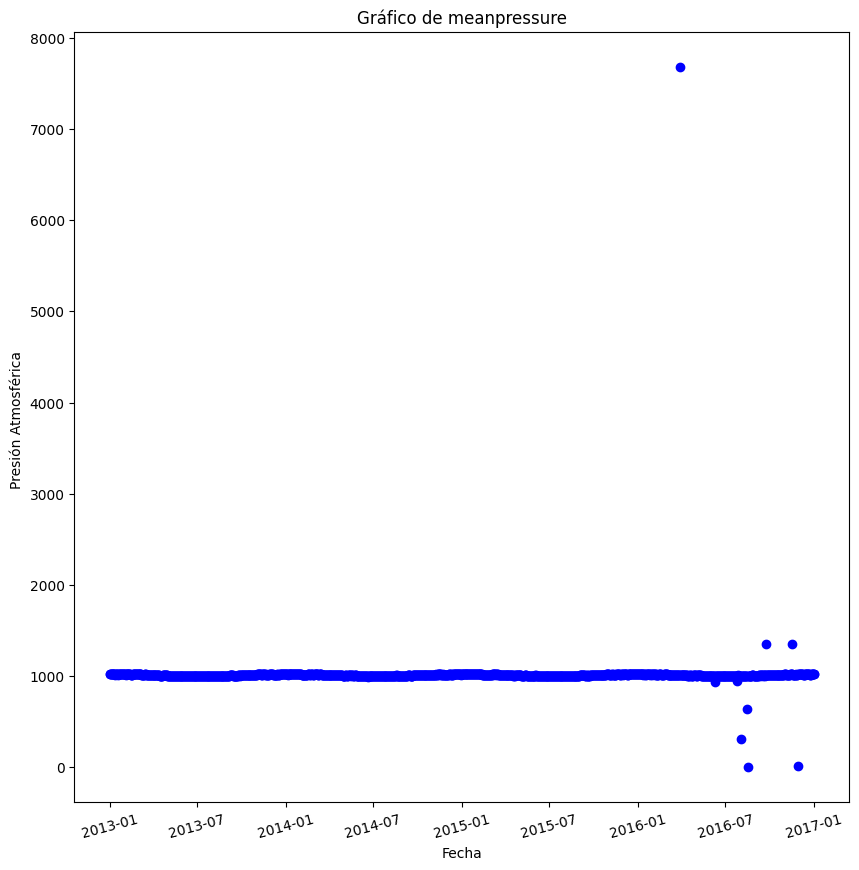

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
data_aux['date'] = pd.to_datetime(data_aux['date'])
plt.rc('figure', figsize=(10, 10))
plt.scatter(data_aux['date'], data_aux['meanpressure'], color='b')

plt.xticks(rotation=15)
plt.title('Gráfico de meanpressure')
plt.xlabel('Fecha')
plt.ylabel('Presión Atmosférica ')

plt.show()


<Axes: ylabel='meanpressure'>

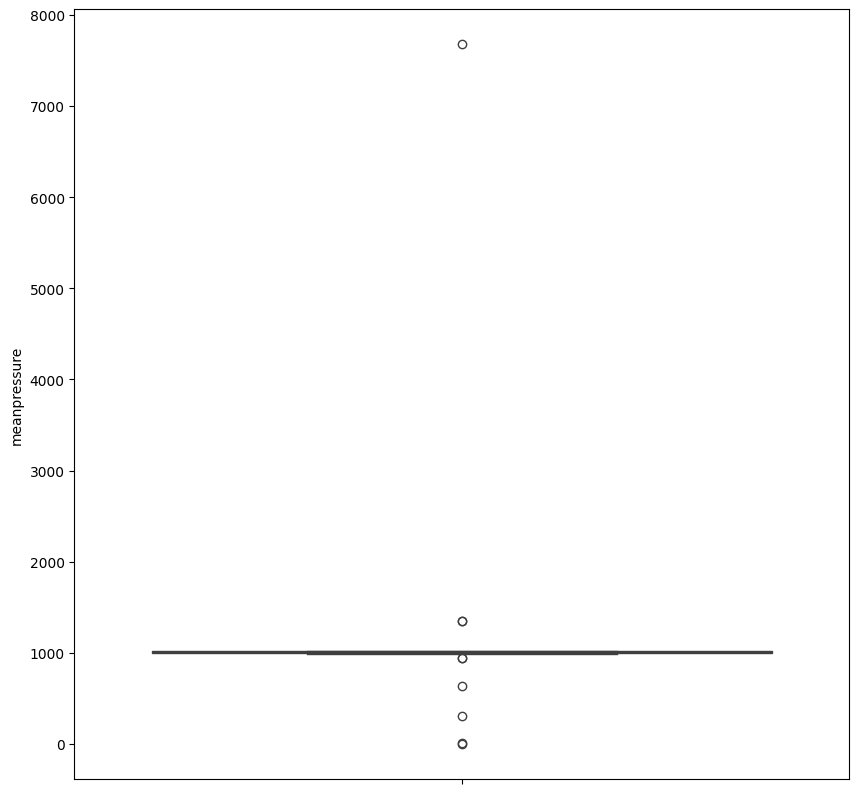

In [55]:
# Realice un diagrama de cajas y alambres para determinar visualmente si hay outliers
sns.boxplot(data=data_aux['meanpressure'])



In [56]:
# Calcular el parámetro Zscore para la columna meanpressure

#1era opcion
#Zscore =np.abs(stats.zscore(data.loc[:,['meanpressure_zscore']]))
#print(data[['date', 'meanpressure', 'meanpressure_zscore']].head())

#2da opcion
data1 = data_aux.loc[:,['meanpressure']].apply(stats.zscore)
data1.head()


,meanpressure
0,0.025321
1,0.037162
2,0.041972
3,0.033647
4,0.029946


In [57]:
data1.head()

,meanpressure
0,0.025321
1,0.037162
2,0.041972
3,0.033647
4,0.029946


In [58]:
# Variar el valor del humbral de Zscore para filtrar valores atípicos hasta que considere que la gráfica de la variable
#  meanpressure sea correcta

zscore=np.abs(stats.zscore(data_aux.loc[:,['meanpressure']]))
index=np.where(zscore >0.3)
print(index)



(array([1182, 1255, 1300, 1309, 1321, 1323, 1362, 1416, 1427]), array([0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [60]:
data_out=data_aux[(zscore<0.3).all(axis=1)]
data_out.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


In [61]:
# Para los datos sin outliers verificar nuevamente las estadísticas generales
# Qué puede decir de los valores máximos y mínimos de los datos filtrados

data_out.describe()
data_out=data[(Zscore < 0.3).all(axis=1)]
data_out.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


<Axes: ylabel='meanpressure'>

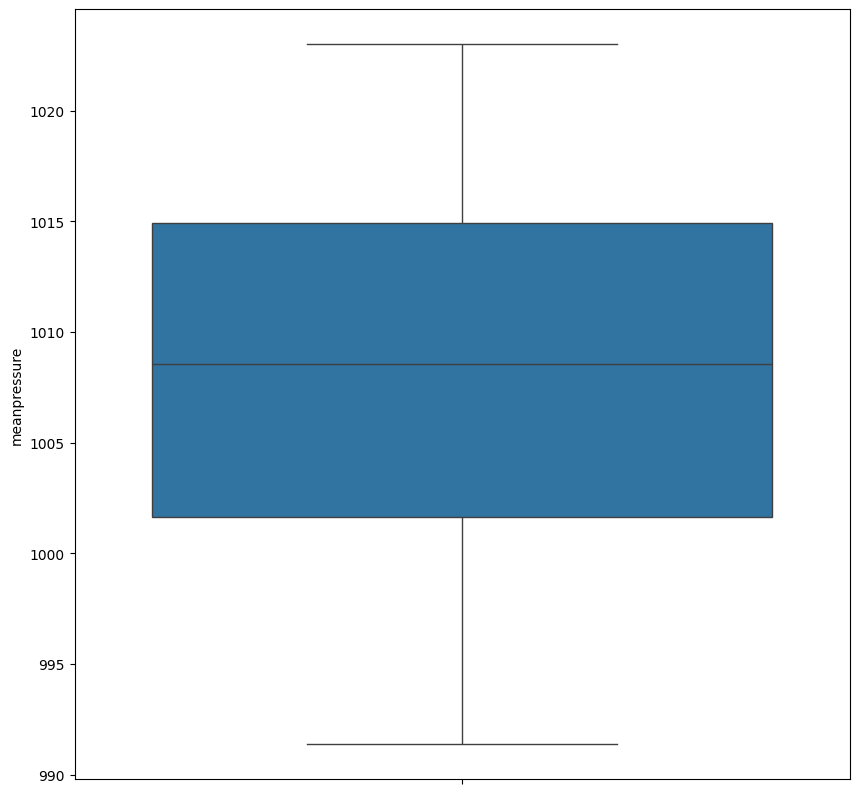

In [62]:
# Realice un diagrama de cajas y alambres para determinar visualmente si aún hay outliers

sns.boxplot(data=data_out['meanpressure'])



<ipython-input-63-4b2f8f50ef10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_out['date'] = pd.to_datetime(data_out['date'])


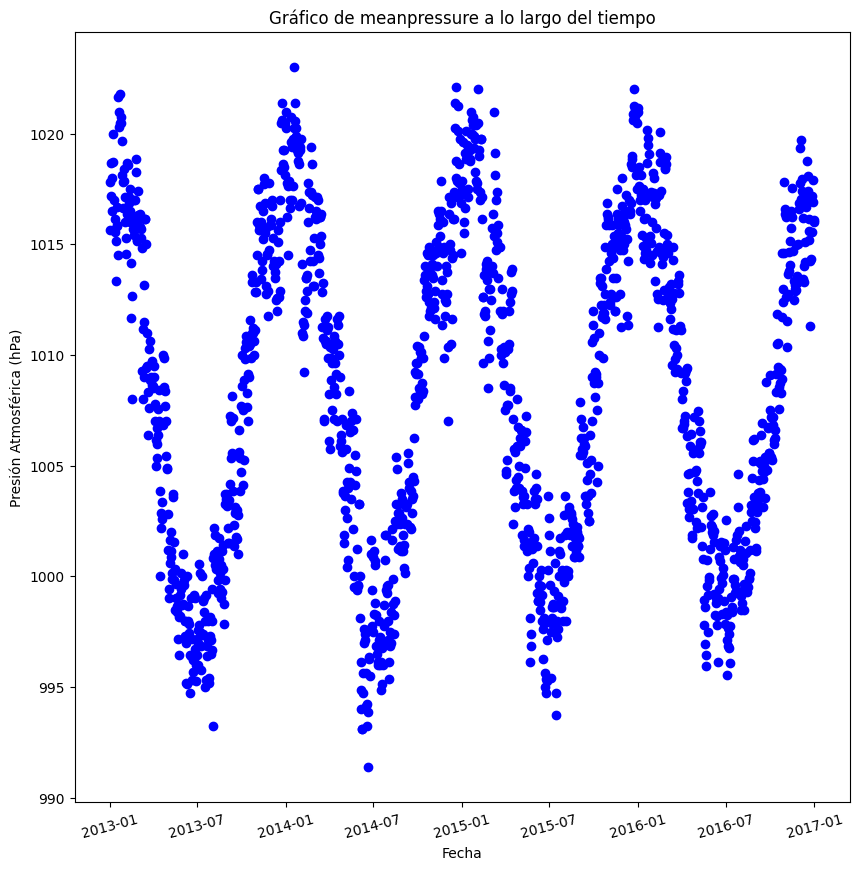

In [63]:
data_out['date'] = pd.to_datetime(data_out['date'])
plt.rc('figure', figsize=(10, 10))
plt.scatter(data_out['date'], data_out['meanpressure'], color='b')

plt.xticks(rotation=15)
plt.title('Gráfico de meanpressure a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Presión Atmosférica (hPa)')

plt.show()